# Importing Libraries.

In [108]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import random
from tensorflow.keras.utils import plot_model

# Prepare data

In [52]:
# The data is already stored into training and testing sets.
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [53]:
# Show the first training examples.
print(f"Training Samples: \n{train_data[0]}\n")
print(f"Training labels: \n{train_labels[0]}\n")

Training Samples: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [54]:
# Check the shape of single example.
train_data[0].shape, train_labels[0].shape

((28, 28), ())

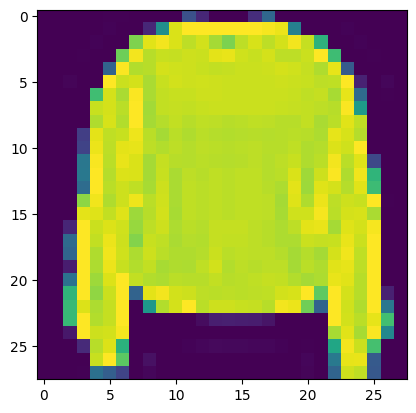

In [55]:
# Plot the single sample.
plt.imshow(train_data[7])

In [56]:
# Check the sample label.
train_labels[7]

2

The sample labels are in numerical form. To make it human readible, we will create a list of class names.

In [57]:
# Create a small list to index the training labels.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankel Boot']

len(class_names)

10

Text(0.5, 1.0, 'Coat')

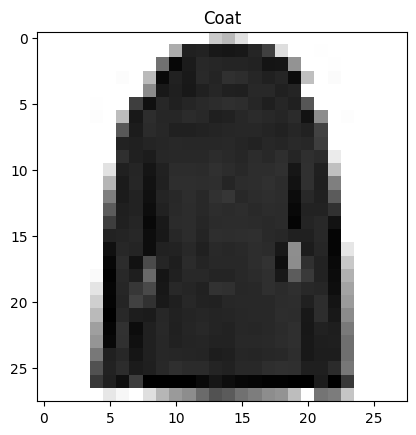

In [58]:
# Plot an example image and it's label.
choice = 2000
plt.imshow(train_data[choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[choice]])

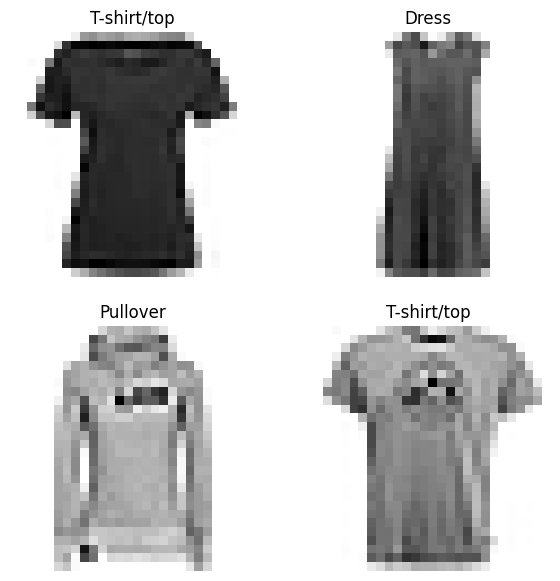

In [59]:
# Plot multiple random images.
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

# Build and Train the multiclass classification model.

- `If labels are one_hot encoded`, use  **CategoricalCrossEntropy()**
- `If labels are not one_hot encoded` use **SparseCategoricalCrossEntropy()**

> NN prefer data to be scaled(or normalised). They like to work with number between 0 - 1

In [60]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [61]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

## Model: 1

In [62]:
# Set a random seed.
tf.random.set_seed(42)

# 1. Create the model.
model1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# 2. Compile the model.
model1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# 3. Fit the model.
history1 = model1.fit(train_data, tf.one_hot(train_labels, depth=10), epochs=10, validation_data=(test_data, tf.one_hot(test_labels, depth=10))) # Validation data will be unseen.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1007 - loss: 2.3392 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0987 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0986 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - 

- `loss`: How wrong the model is finding patterns between **training data** and **training labels** in the dataset during training.
- `accuracy`: How correctly our model is finding patterns between **training data** and **training labels** in the dataset during training.
- `validation loss and accuracy`: Model loss and accuracy in the validation data.

In [63]:
# Check the model summary.
model1.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [64]:
# Check the min and max of training data.
train_data.min(), train_data.max()

(0, 255)

## Model 2:

### Normalising.

In [65]:
# We can normalised the training data by dividing by the maximum.
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max value of the scaled training data.
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

### Building and training.

In [66]:
# Set random seed.
tf.random.set_seed(42)

# 1. Create the model.
model2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation='softmax')
])

# 2. Compile the model.
model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# 3. Fit the model.
history2_norm = model2.fit(train_data_norm, tf.one_hot(train_labels, depth=10), epochs=10, validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2431 - loss: 1.8900 - val_accuracy: 0.3538 - val_loss: 1.4393
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3932 - loss: 1.3870 - val_accuracy: 0.3976 - val_loss: 1.3329
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4285 - loss: 1.2892 - val_accuracy: 0.4196 - val_loss: 1.2868
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4413 - loss: 1.2610 - val_accuracy: 0.4327 - val_loss: 1.2626
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4517 - loss: 1.2473 - val_accuracy: 0.4496 - val_loss: 1.2460
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4664 - loss: 1.2327 - val_accuracy: 0.4586 - val_loss: 1.2297
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4844 - loss: 1.2151 - val_accuracy: 0.4867 - val_loss: 1.2153
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4994 - loss: 1.2007 - 

***Our model is booming after normalising the data.***

## Model 3:

### Finding the ideal learning rate.

In [67]:
# Set random seed.
tf.random.set_seed(42)

# Create model.
model3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model.
model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Create the learning rate callback.
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model.
history3_lr = model3.fit(train_data_norm,
                         train_labels,
                         validation_data=(test_data_norm, test_labels),
                         epochs=40,
                         callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4410 - loss: 1.5513 - val_accuracy: 0.7162 - val_loss: 0.8552 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7341 - loss: 0.7704 - val_accuracy: 0.7315 - val_loss: 0.6839 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7554 - loss: 0.6500 - val_accuracy: 0.7679 - val_loss: 0.6392 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7830 - loss: 0.6054 - val_accuracy: 0.7849 - val_loss: 0.6094 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7999 - loss: 0.5783 - val_accuracy: 0.7926 - val_loss: 0.5889 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8065 - loss: 0.5585 - val_accuracy: 0.7968 - val_loss: 0.5764 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8100 - l

Text(0.5, 1.0, 'Finding the ideal learning rate')

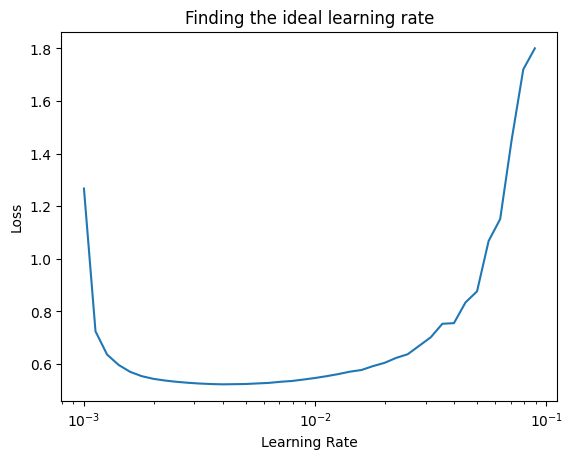

In [68]:
# Plot the learning rate decay curve.
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, history3_lr.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

### Recreating the model with ideal learning rate.

In [69]:
# Setting random seed.
tf.random.set_seed(42)

# Creating the model
model3_ideal_lr = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compiling the model.
model3_ideal_lr.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=["accuracy"])

# Fitting the model.
history3_ideal_lr = model3_ideal_lr.fit(train_data_norm,
                                        train_labels,
                                        epochs=20,
                                        validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2002 - loss: 1.9827 - val_accuracy: 0.3063 - val_loss: 1.6580
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3292 - loss: 1.6095 - val_accuracy: 0.3735 - val_loss: 1.5051
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3714 - loss: 1.4912 - val_accuracy: 0.3998 - val_loss: 1.4440
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.3882 - loss: 1.4335 - val_accuracy: 0.4110 - val_loss: 1.4004
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4023 - loss: 1.3778 - val_accuracy: 0.4018 - val_loss: 1.3168
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.3930 - loss: 1.3055 - val_accuracy: 0.4092 - val_loss: 1.2815
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4117 - loss: 1.2721 - val_accuracy: 0.4426 - val_loss: 1.2585
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4553 - loss: 1.2491 - 

# Comparing the loss curves of each model.

<Axes: title={'center': 'Normalised and Ideal Data and Learning Rate'}>

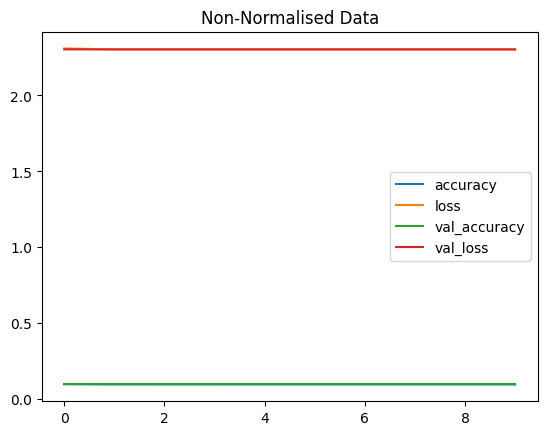

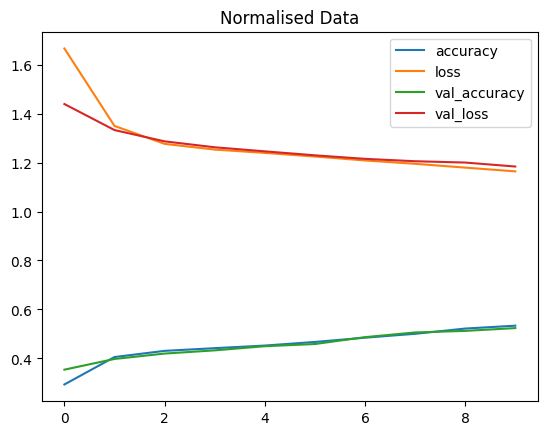

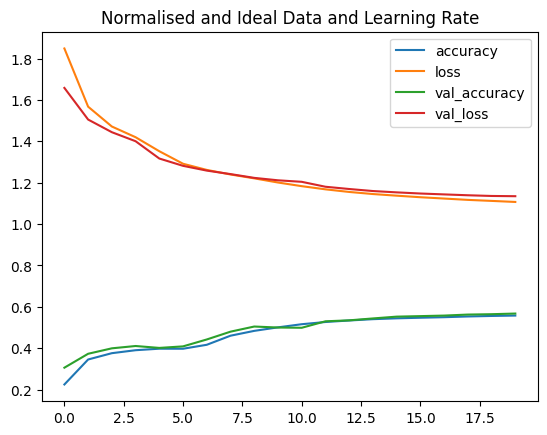

In [70]:
# Plot the non-normalised data.
pd.DataFrame(history1.history).plot(title="Non-Normalised Data")

# Plot the normalised data.
pd.DataFrame(history2_norm.history).plot(title="Normalised Data")

# Plot the normalised and ideal learning rate data.
pd.DataFrame(history3_ideal_lr.history).plot(title="Normalised and Ideal Data and Learning Rate")

> When comparing the results:
The same model with even slightly different data can produce dramatically different results.

# Evaluating the classification model.
To evaluate our multi-class classification model:
1. Evaluate it's performance using other classification metrics(recall, precision, F1-Score, Confusion matrix)
2. Asses some of it's predictions(through visualizations).
3. Improve it's results (by training it for longer or changing the architecture of the model).
4. Save and export it for use in an application.

## Evaluating by confusion matrix.

Making customized function.

In [73]:
# Creating confusion matrix.

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confusion matrix.
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # Normalize the confusion matrix.
  n_classes = cm.shape[0]

  # Let's pretify it.
  fig, ax = plt.subplots(figsize=figsize)

  # Create a matrix plot.
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes.
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes.
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom.
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust the label size.
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set the threshold for different colors.
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=text_size)

In [74]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankel Boot']

In [75]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [78]:
# Making some predictions with our model.
y_probs = model3_ideal_lr.predict(test_data_norm)

# View prediction probs 5.
y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


array([[3.0468640e-05, 4.8255813e-03, 1.0861746e-06, 1.1093451e-04,
        4.5284025e-07, 1.2052564e-01, 5.2632213e-06, 4.1862875e-01,
        9.6462260e-04, 4.5490718e-01],
       [2.2927445e-04, 1.1321477e-30, 4.0027401e-01, 6.2010741e-08,
        5.3981853e-01, 0.0000000e+00, 5.9678055e-02, 0.0000000e+00,
        4.2723667e-17, 0.0000000e+00],
       [2.1821817e-02, 5.3955305e-01, 1.0559307e-03, 6.0712136e-02,
        4.5509962e-04, 9.8385066e-02, 4.6367086e-03, 6.5459039e-07,
        2.7337956e-01, 4.9411941e-10],
       [2.4846224e-02, 5.3906792e-01, 1.2284096e-03, 6.7830257e-02,
        5.3067628e-04, 6.9530495e-02, 5.3568245e-03, 1.8316354e-07,
        2.9160905e-01, 8.2878975e-11],
       [1.8387106e-01, 6.5176469e-09, 2.5365278e-01, 2.6786236e-02,
        1.5735553e-01, 4.4418148e-33, 3.7824568e-01, 0.0000000e+00,
        8.8655303e-05, 0.0000000e+00]], dtype=float32)

> **Note**: Make predictions on the same kind of data. If the model is trained on normalised data, then make predictions on normalised data.

In [80]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([3.0468640e-05, 4.8255813e-03, 1.0861746e-06, 1.1093451e-04,
        4.5284025e-07, 1.2052564e-01, 5.2632213e-06, 4.1862875e-01,
        9.6462260e-04, 4.5490718e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankel Boot')

In [81]:
# Convert all of the prediction probabilities into integers.
y_preds = y_probs.argmax(axis=1)
y_preds[:5]

array([9, 4, 1, 1, 6])

In [82]:
confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[642,  14,  11, 130,   0,   0, 141,   1,  61,   0],
       [  9, 829,   2,  23,   0,   9,   4,   0, 124,   0],
       [ 66,   0, 489,  16, 237,   0, 182,   0,  10,   0],
       [249,  30,   3, 486,   0,   2,  52,   0, 178,   0],
       [ 44,   0, 331,  17, 456,   0, 148,   0,   4,   0],
       [  0,  21,   0,   0,   0, 786,   0,  40,   3, 150],
       [230,   4, 294,  81,  50,   0, 299,   0,  42,   0],
       [  0,   0,   0,   0,   0, 104,   0, 141,   0, 755],
       [ 40, 281,   2,  69,   0,  19,   7,   0, 576,   6],
       [  0,   1,   0,   0,   0,  12,   0,  13,   0, 974]])

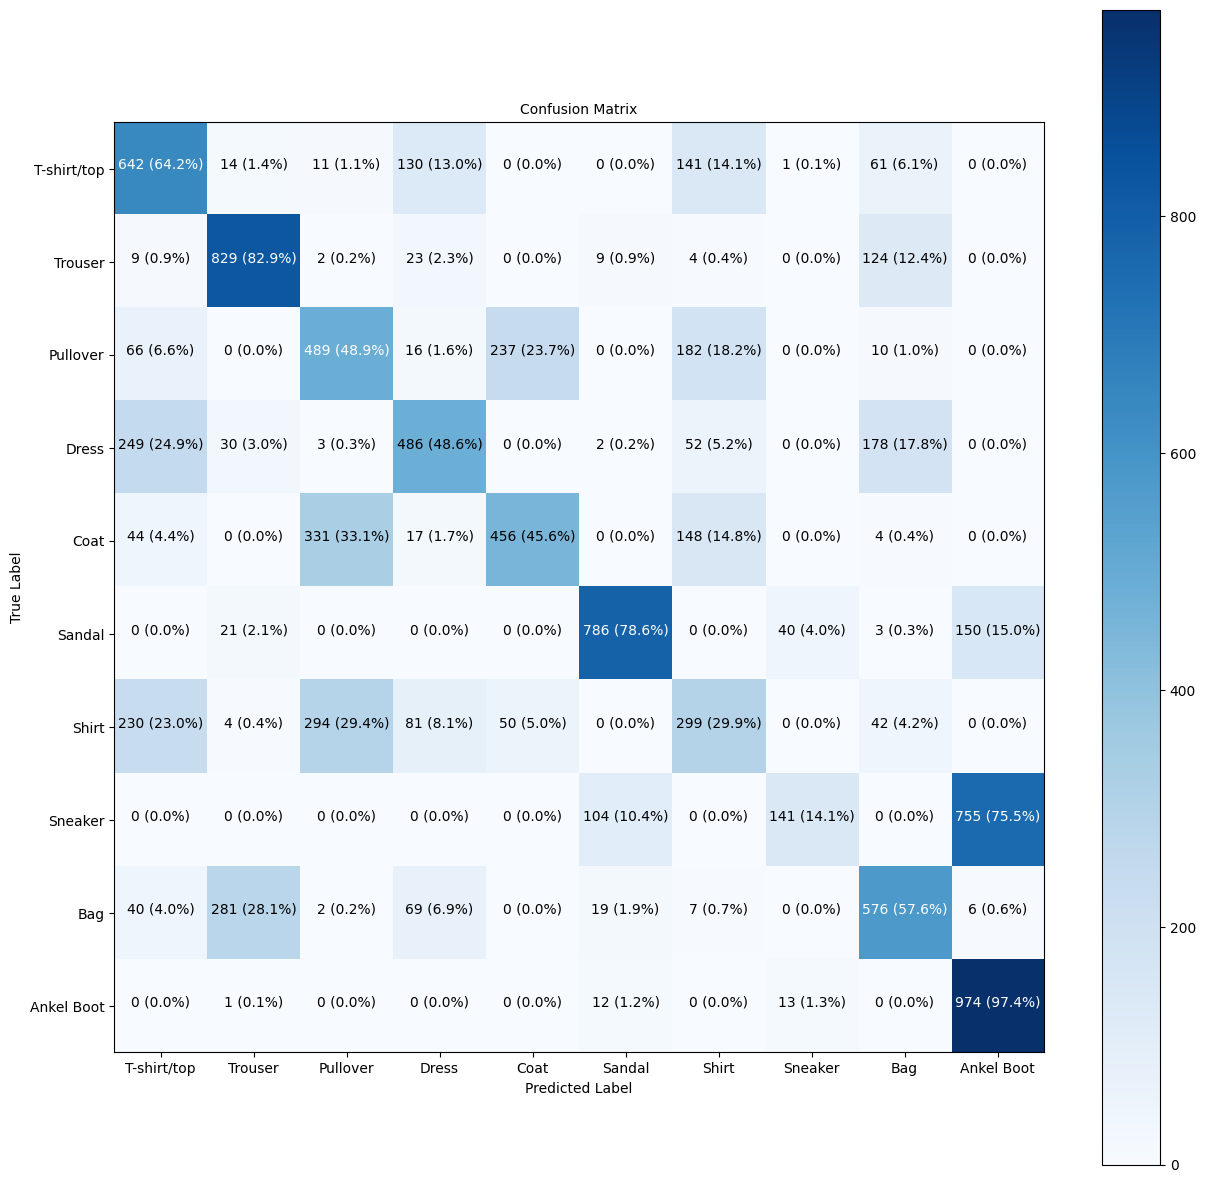

In [83]:
# View a pretier confusion matrix.
make_confusion_matrix(y_true=test_labels, y_pred=y_preds, classes=class_names, figsize=(15, 15), text_size=10)

## Evaluating model with visualization.
* Plot a random image.
* Make prediction on said image.
* Label the plot with the truth label and the predicted label.

In [98]:
def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with the true and predicted labels.
  """

  # Set up random integer.
  i = random.randint(0, len(images))

  # Create predictions and targets.
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image.
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the title depending on if the prediction is right or wrong.
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 100*tf.reduce_max(pred_probs), true_label), color=color)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


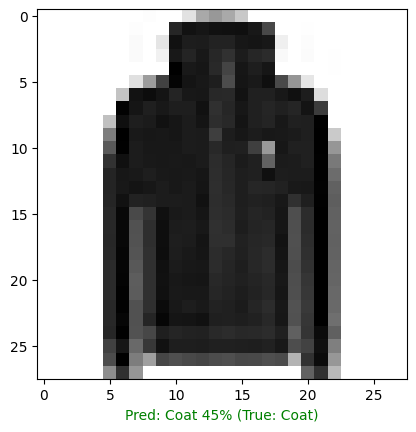

In [99]:
# Check out a random image as well as its prediction.
plot_random_image(model=model3_ideal_lr, images=test_data_norm, true_labels=test_labels, classes=class_names)

# What Patterns our model is learning.

In [100]:
# Find the layers of our most recent model.
model3_ideal_lr.layers

[<Flatten name=flatten_11, built=True>,
 <Dense name=dense_33, built=True>,
 <Dense name=dense_34, built=True>,
 <Dense name=dense_35, built=True>]

In [101]:
# Extract a particular layer.
model3_ideal_lr.layers[1]

<Dense name=dense_33, built=True>

In [103]:
# Get the patterns of a layer in our network.
weights, biases = model3_ideal_lr.layers[1].get_weights()

# Shapes,
weights, weights.shape

(array([[-0.5026725 ,  0.02363372,  0.59080684, -0.19389276],
        [ 0.68647945,  0.06204954,  0.3985927 , -0.12094583],
        [ 1.1286006 ,  0.06842737,  1.600401  , -1.5214243 ],
        ...,
        [ 0.3303677 , -0.09468722, -0.589757  ,  0.6665397 ],
        [ 0.07352653,  0.08179165, -0.344002  ,  0.3055073 ],
        [ 0.6118599 , -0.04152706,  0.62656534, -0.55761504]],
       dtype=float32),
 (784, 4))

Each data points in our input tensors(784) our weight matrix have 4 numbers that it starts to learn and adjust to find patterns in 784 number.

In [104]:
# Get the patterns of a layer in our network.
weights2, biases2 = model3_ideal_lr.layers[2].get_weights()

# Shapes,
weights2, weights2.shape

(array([[-0.17993873, -0.38116106, -0.8278584 ,  4.966191  ],
        [ 0.20940214, -0.75660646, -0.08297902,  0.6537712 ],
        [-0.03206146, -0.2871616 , -0.15000457,  0.8084677 ],
        [-0.20790452, -0.20688432, -0.06205797, -0.62153846]],
       dtype=float32),
 (4, 4))

Checking the bias vector..

In [106]:
biases, biases.shape

(array([ 0.77454656, -0.03640395,  0.8527561 ,  1.1286374 ], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these are paired with a weigths vecotr.
The biased vector is initialized as zeros(In case for TensorFlow Dense Layer)

In [107]:
model3_ideal_lr.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

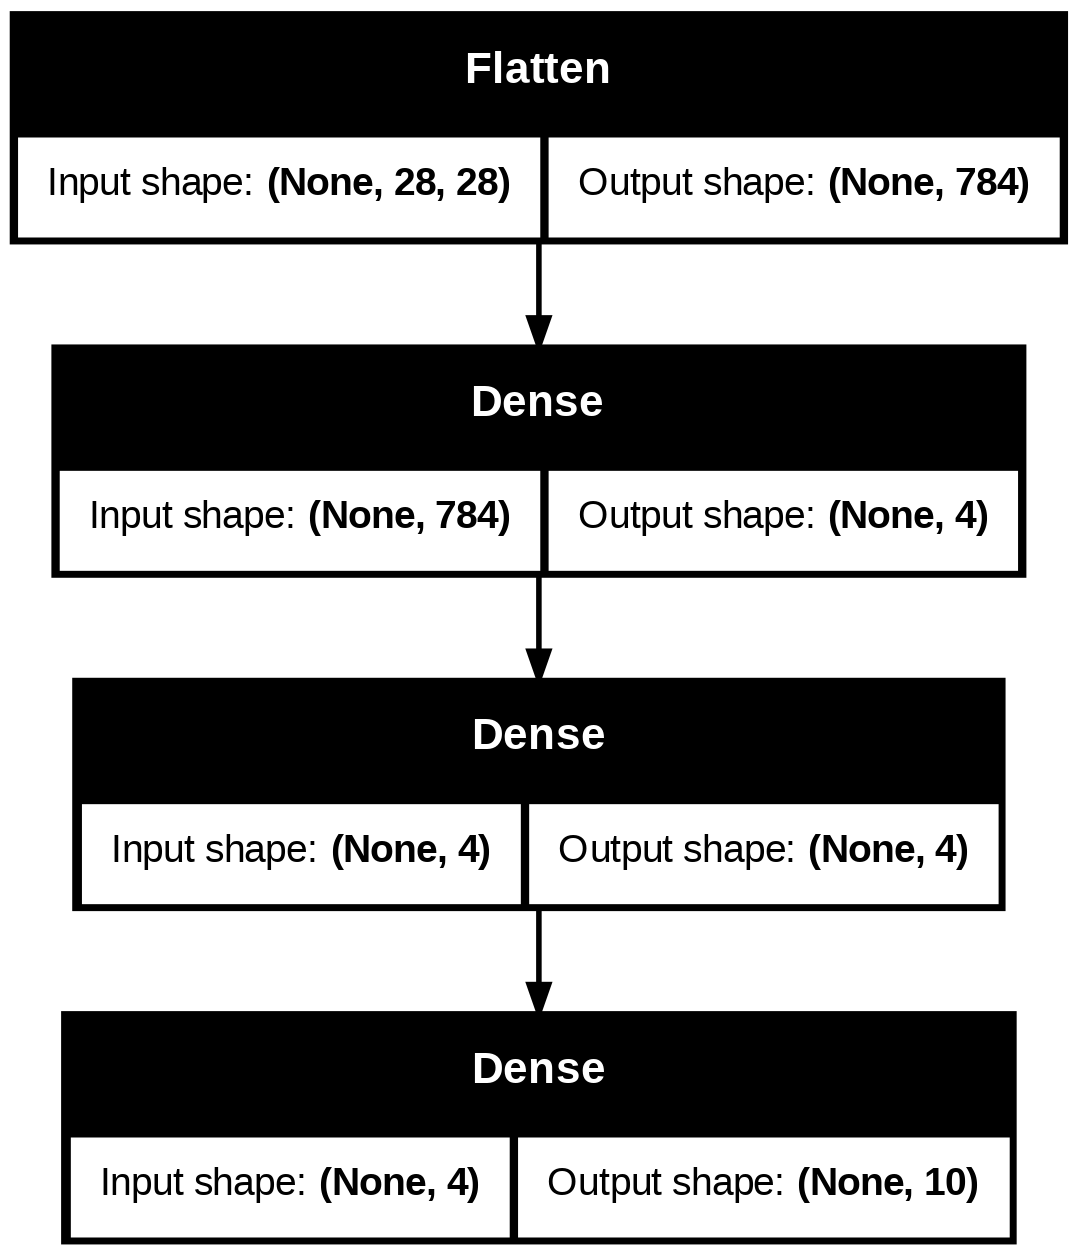

In [109]:
# Checking another way of viewing the DLM

# Plot the inputs and outputs of each layer.
plot_model(model3_ideal_lr, show_shapes=True)